In [1]:
import sys
sys.path.append('..')

In [2]:
from helpers import *

In [30]:
import pandas as pd
import numpy as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

In [46]:
from scipy.stats import kurtosis, skew

In [7]:
df = msframe('MSFT')

In [10]:
dts = df.pct_change()[next(c for c in df.columns if 'adj_close' in c)]

In [15]:
sig = dts.dropna()

In [20]:
X = left_windows(sig, 30)

In [22]:
test_x = X.values[0,:]

In [28]:
test_x

array([-0.00190394, -0.00190757, -0.00191122,  0.00574464, -0.01196674,
        0.00724995, -0.0268152 ,  0.00656141,  0.00651864,  0.00647642,
        0.02030929, -0.00757358,  0.00900783,  0.02221645,  0.0047321 ,
        0.00470981,  0.00468773,  0.00466586, -0.00588041,  0.01190209,
       -0.00274567,  0.00844028,  0.00836964,  0.00830017,  0.02426243,
        0.02624168, -0.00502678,  0.00633593,  0.01271278,  0.0125532 ])

In [26]:
def est_pdf(s):
    variance = np.std(s)**2
    gauss = lambda mu: lambda x: ((2*np.pi*variance)**(-1/2))*np.exp(-(x-mu)**2/(2*variance))
    return lambda x: sum(gauss(mu)(x) for mu in s)

In [27]:
pdf = est_pdf(test_x)

In [42]:
x = np.arange(-.1,.1,.001)
y = np.vectorize(pdf)(x)

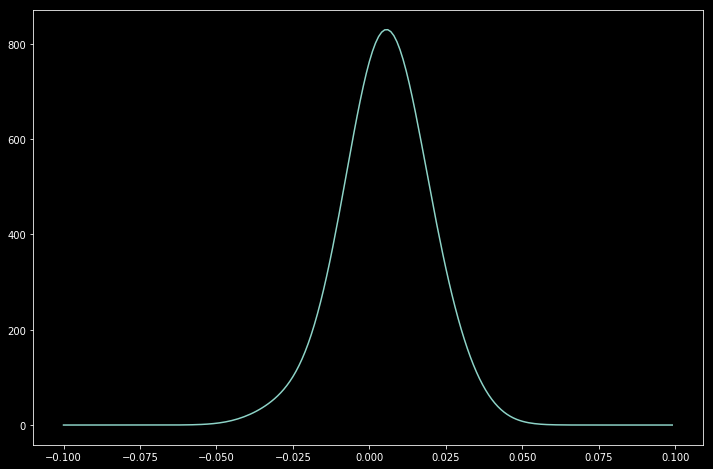

In [44]:
plt.figure(figsize=(12,8))
plt.plot(x,y)

In [49]:
pdfs = [est_pdf(row.values) for i, row in X.iterrows()]

In [51]:
pdf_samples = [np.vectorize(_pdf)(x) for _pdf in pdfs[::100]]

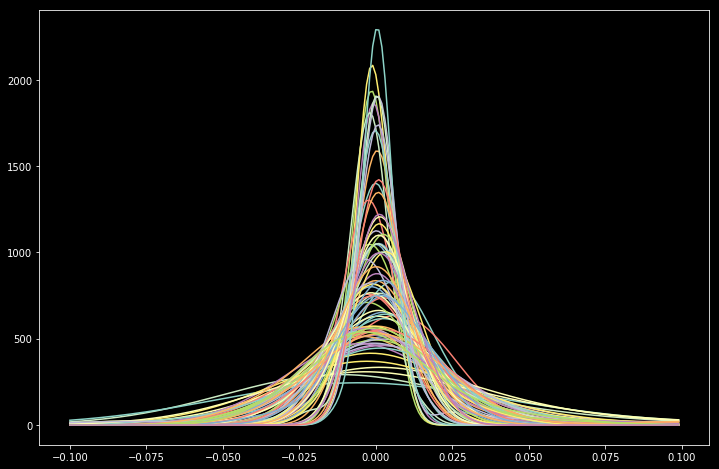

In [53]:
plt.figure(figsize=(12,8))
for y in pdf_samples:
    plt.plot(x,y)